Primero Importamos las librerias necesarias para realizar la practica


In [59]:
### Utilizare las librerias de numpy para el tratamiento numérico y matplotlib para la graficacion

import numpy as np
import matplotlib.pyplot as plt

Ahora definiremos los parametros del transformador

In [60]:
S_base = 630000  # Potencia nominal en VA
V_prim_nom = 20000  # Tensión primaria nominal en V
V_sec_nom = 400  # Tensión secundaria nominal en V
Ecc = 4.5  # Tensión de cortocircuito en %
Pcu = 6500  # Pérdidas en el cobre en W



Tension aplicada en el primario (5% más)

In [61]:
V_prim_real = V_prim_nom * 1.05
print(V_prim_real)

21000.0


Calculo impedancia de base

In [62]:
Z_base_prim = (V_prim_nom ** 2) / S_base
Z_base_sec = (V_sec_nom ** 2) / S_base

print(Z_base_prim, Z_base_sec)

634.9206349206349 0.25396825396825395


Calculo de la impedancia de cortocircuito en pu

In [63]:
Z_cc_pu = Ecc / 100
print(Z_cc_pu)

0.045


Calculo de la impedancia en ohmnios vista desde el primario

In [64]:
Z_cc_prim = Z_cc_pu * Z_base_prim
print (Z_cc_prim)

28.571428571428573


Calculo de la resistencia y reactancia en pu

In [65]:
R_t_pu = Pcu / S_base  # Resistencia en pu
X_t_pu = np.sqrt(Z_cc_pu ** 2 - R_t_pu ** 2)  # Reactancia en pu
print(R_t_pu, X_t_pu)

0.010317460317460317 0.043801255833567504


Impedancia y reactancia vistas desde el primario y el secundario (En ohmnios)

In [66]:
# Impedancia en ohmios (vista desde el primario)
R_t_prim = R_t_pu * Z_base_prim
X_t_prim = X_t_pu * Z_base_prim

In [67]:
# Impedancia en ohmios (vista desde el secundario)
R_t_sec = R_t_pu * Z_base_sec
X_t_sec = X_t_pu * Z_base_sec

In [68]:
print(f"""Impedancia desde el primario : {R_t_prim}
Reactancia primario : {X_t_prim}
Impredancia secundario: {R_t_sec}
Reactancia secundario: {X_t_sec}""" )

Impedancia desde el primario : 6.550768455530361
Reactancia primario : 27.810321164169846
Impredancia secundario: 0.002620307382212144
Reactancia secundario: 0.011124128465667937


Definimos rango de carga

In [69]:
carga_pu = np.linspace(0, 1.5, 100)
cosfi_values= [0.6, 0.7, 0.8, 0.9, 1.0]  # Factores de potencia
colores = ['r', 'g', 'b', 'm', 'k']

Creacion de la grafica

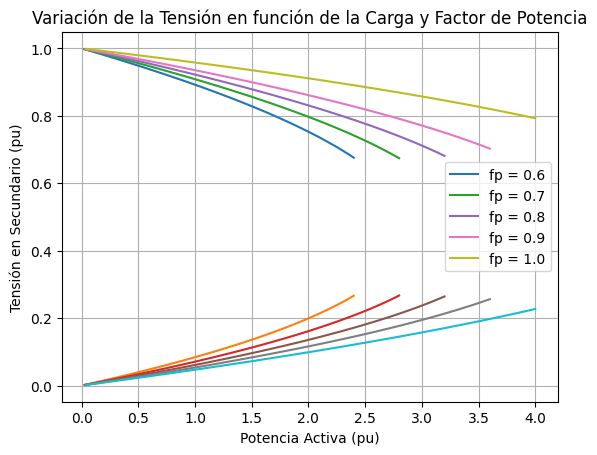

In [70]:
for cosfi in cosfi_values:
    ejex = []
    V2min_values = []
    V2max_values = []

    # **Iterar sobre distintos niveles de carga**
    for k in range(1, 101):  # De 1% a 100% de carga
        S2 = 4 * k / 100  # Potencia aparente relativa en pu
        P2 = S2 * cosfi   # Potencia activa en pu
        Q2 = S2 * np.sin(np.arccos(cosfi))  # Potencia reactiva en pu
        
        # **Resolver la ecuación cuadrática para la corriente**
        a = R_t_pu**2 + X_t_pu**2
        b = 2 * R * P2 + 2 * X_t_pu * Q2 - V1**2
        c = P2**2 + Q2**2

        discriminante = b**2 - 4 * a * c
        if discriminante < 0:
            break  # Evita problemas si no hay solución real
        
        # **Cálculo de las corrientes mínima y máxima**
        Imax = np.sqrt((-b + np.sqrt(discriminante)) / (2 * a))
        Imin = np.sqrt((-b - np.sqrt(discriminante)) / (2 * a))
        
        # **Evitar valores negativos o irreales**
        if Imax < 0 or Imin < 0:
            continue
        
        # **Cálculo de las tensiones secundarias mínima y máxima**
        V2max = S2 / Imax
        V2min = S2 / Imin
        
        # **Guardar valores para graficar**
        ejex.append(P2)
        V2min_values.append(V2min)
        V2max_values.append(V2max)

    # **Graficar curvas de V2min y V2max**
    plt.plot(ejex, V2min_values, label=f'fp = {cosfi:.1f}')
    plt.plot(ejex, V2max_values)

# **Personalización del gráfico**
plt.xlabel('Potencia Activa (pu)')
plt.ylabel('Tensión en Secundario (pu)')
plt.title('Variación de la Tensión en función de la Carga y Factor de Potencia')
plt.legend()
plt.grid(True)
plt.show()